# Data Exploration

In [1]:
# Decision Trees (DTs) are a supervised learning method 
# that can be used for classification. 

In [2]:
# The goal is to create a model that predicts the value of a target variable 
# by learning simple decision rules inferred from the data features

In [3]:
# Setup
# First, let's make sure this notebook works well in both python 2 and 3,
# import a few common modules, ensure MatplotLib plots figures inline and 
# prepare a function to save the figures:

In [4]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Numpy is the fundamental package for scientific computing with Python. 
# SciPy (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing. 
# Os module provides a portable way of using operating system dependent functionality.
import numpy as np # np is an alias pointing to numpy
import scipy as sp # sp is an alias pointing to scipy
import pandas as pd #pd is an alias pointing to pandas
import os

# Seed the generator to make this notebook's output stable across runs
np.random.seed(22)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html

# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

# Define path of an image
# Function that takes as input fig_id and returns back the image path
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# Save image in a specific path
# Function that takes as input fig_id and saves the image in a specific format (i.e., png, 300 dpi)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [6]:
# Training and Visualizing a Decision Tree

In [7]:
########################################### Imports ###########################################
from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for 
# classification and regression
# Documentation for decision Tree Classifier 
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seaborn is a Python data visualization library based on matplotlib. 
# Seaborn documentation can be found here https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [8]:
######################################### Data Exploration #########################################
#Load data_set
df = pd.read_csv(r'C:\Users\seanj\Desktop\Intro to Business Analytics\HW1\HW1_Data.csv')
df.head() #df.head() is used to check the first few rows of the dataset

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


In [9]:
# Explore the data
df.describe()

# Drop the NAs on the target variable, churndep
df.dropna(subset=['churndep'])

# We notice that there are some negative values on columns, 'eqpdays' and 'revenue'
# I am going to filter out negative values of 'eqpdays' and 'revenue'
df = df[df['eqpdays'] >= 0] 
df = df[df['revenue'] >= 0]

# Explore the data again
df.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000
mean,58.622173,24.926872,8.052027,18.757097,391.789222,0.894705,0.363177,0.057248,0.184933,0.677113,0.043964,0.497362
std,44.101060,34.747400,16.543853,9.546107,254.746976,0.306937,0.480923,0.232319,0.388249,0.467587,0.224189,0.500001
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.440000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.335000,13.330000,2.000000,16.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70.970000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The frequency of instances per class in target variable is:  {0: 16006, 1: 15838}
The names of the two distinct classes in target variables are:  [1, 0]


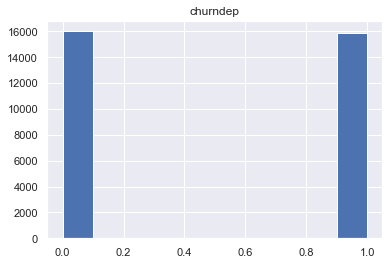

In [10]:
df.hist(column='churndep')
# The distribution of the two classes is almost equal.

# keep specific attributs (Include all the x variables except the target variable in the last column)
X = df.iloc[:,0:-1] 
# or X = df.iloc[:,:11]
feature= ["revenue", "outcalls","incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls"]

# Retriving Target Variable
y = df.iloc[:,11]

# Exploring Target Variable
# I want to find out the number of each instances in the target variable
unique, counts = np.unique(y, return_counts=True) # 3 distinct classes equally represented
print("The frequency of instances per class in target variable is: " , dict(zip(unique, counts)))
print("The names of the two distinct classes in target variables are: ", list(y.unique())) 

churndep
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: revenue, dtype: object

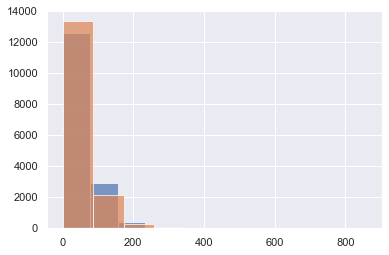

In [11]:
# We can also check if a feature has a very skewed distribution of classes. 
# For example, to plot a histogram of revenue, we can do the following:
df.groupby('churndep').revenue.hist(alpha=0.7)
# To plot the other attributes, replace ‘revenue’ with the other attribute within our model.

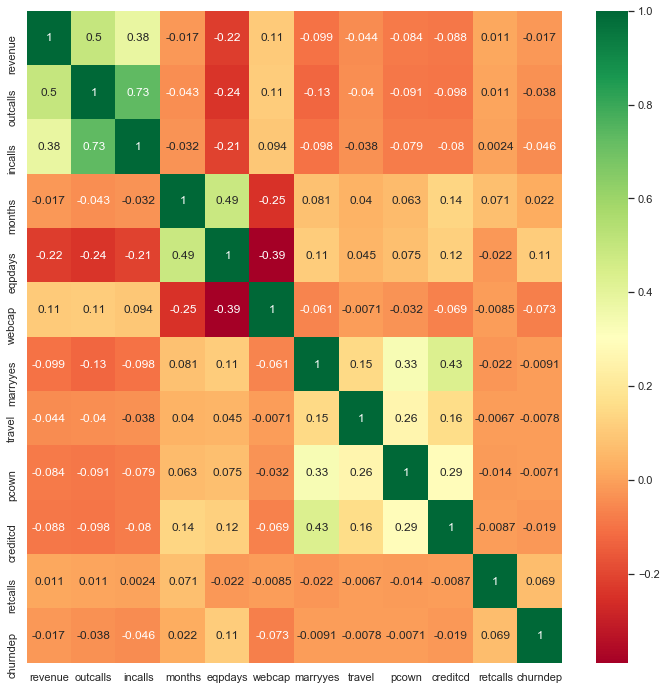

In [12]:
import seaborn as sns
corrmatrix = df.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(12,12))

# plot heat map
plot = sns.heatmap(df[top_correlated_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# A pairplot plot a pairwise relationships in a dataset. 
sns.set()
sns.pairplot(df)

# Model Training

In [14]:
# The following code trains a DecisionTreeClassifier on the HW1 dataset
# Decision Tree Induction (Fitting the Model)
# Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# split validation
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=1)

In [16]:
# After properly splitting the data we can finally start modeling and testing out which parameters should be tuned to improve model performance. 
# In order to compare different models we will look at Accuracy of the test set as a benchmark.

# try different max_leaf_nodes parameters:
for i in range(2,30,1):
    clf1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, max_leaf_nodes=i)
    clf1 = clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    rate = accuracy_score(y_test, y_pred1)
    print(str(i) + " " + str(rate))
    
    # Pick the one with highest number (accuracy)

2 0.5861419300816412
3 0.5861419300816412
4 0.5959807410508687
5 0.5959807410508687
6 0.5959807410508687
7 0.5997487963156793
8 0.5997487963156793
9 0.5992254553066778
10 0.5992254553066778
11 0.5992254553066778
12 0.5992254553066778
13 0.5975507640778731
14 0.5983881096922755
15 0.5983881096922755
16 0.5983881096922755
17 0.5983881096922755
18 0.5983881096922755
19 0.5983881096922755
20 0.5983881096922755
21 0.5983881096922755
22 0.5982834414904752
23 0.5982834414904752
24 0.5985974460958761
25 0.5985974460958761
26 0.5985974460958761
27 0.5985974460958761
28 0.5985974460958761
29 0.5985974460958761


In [17]:
# try different min_impurity_decrease values:
import numpy as np

for i in np.arange(0,0.011,0.001):
    clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_impurity_decrease=i)
    clf2 = clf2.fit(X_train, y_train)
    y_pred2 = clf1.predict(X_test)
    rate = accuracy_score(y_test, y_pred2)
    print(str(i) + " " + str(rate))
    
    # Pick the one with highest number (accuracy)

0.0 0.5985974460958761
0.001 0.5985974460958761
0.002 0.5985974460958761
0.003 0.5985974460958761
0.004 0.5985974460958761
0.005 0.5985974460958761
0.006 0.5985974460958761
0.007 0.5985974460958761
0.008 0.5985974460958761
0.009000000000000001 0.5985974460958761
0.01 0.5985974460958761


In [32]:
######################################### Imports #########################################
from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, I had to change it to:
#os.chdir("/Users/vtodri/Dropbox/Vilma/Teaching/Emory/Fall/MSBA/Lectures/Week 2")
os.chdir("/Users/seanj/Desktop/Intro to Business Analytics/HW1")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
    
# change working directory again to where the df.dot file will be made
# set the working directory to be within the newly created ./images/decision_trees
# os.chdir("./images/decision_trees")    
os.chdir("./images/decision_trees")

import graphviz
from sklearn import tree
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

In [19]:
################################# Visualization of Decision Tree ##########################

In [30]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # Be aware of default parameters
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [35]:
export_graphviz(
        tree_clf,
        out_file=image_path("tree.dot"),
        feature_names=feature,
        class_names='churn',
        rounded=True,
        filled=True
    )

# Then you can convert this .dot file to a variety of formats such as PDF or PNG using
# the dot command-line tool from the graphviz package.

# change working directory again to where the iris_tree.dot file will be made
# set the working directory to be within the newly created ./images/decision_trees
os.chdir("./images/decision_trees")

FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\decision_trees\\tree.dot'

In [36]:
#An alternative way to do it in python
import pydot  # run 'pip install pydot' in anaconda prompt from 'https://stackoverflow.com/questions/53773344/importerrorno-module-named-pydot'
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng tree.dot -o tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

print(os.getcwd())
path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "tree.png")
Image(filename="tree.png")

FileNotFoundError: [Errno 2] No such file or directory: 'tree.dot'

# Model Evaluation

In [21]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
###################################### Split the Data ######################################
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=21)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default
# In this case, I made a split of 80/20 between training data and test data

In [23]:
############################# Build Model & Apply it to the Test Set #######################

In [24]:
#Build the decision tree (Per Instruction)
clf1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, max_leaf_nodes=14, min_impurity_decrease=0.001, random_state=42) 

# "clf3.fit(X_train, y_train)"" fits the model and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf1.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.66      0.43      0.52      3194
       Churn       0.57      0.78      0.66      3175

    accuracy                           0.60      6369
   macro avg       0.62      0.60      0.59      6369
weighted avg       0.62      0.60      0.59      6369



In [29]:
#Build the decision tree (Modified 1)
clf2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=21)

# "clf3.fit(X_train, y_train)"" fits the model and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred_1 = clf2.fit(X_train, y_train).predict(X_test)

In [26]:
###################################### Confusion Matrix #####################################
# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix by Sean Jung")
    else:
        print('Confusion matrix, without normalization by Sean Jung')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization by Sean Jung
[[1367 1827]
 [ 705 2470]]
              precision    recall  f1-score   support

           0       0.66      0.43      0.52      3194
           1       0.57      0.78      0.66      3175

    accuracy                           0.60      6369
   macro avg       0.62      0.60      0.59      6369
weighted avg       0.62      0.60      0.59      6369



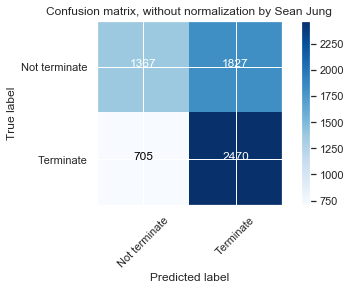

In [27]:
# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# This is a non-normalized confusion matrix of the model
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('Not terminate', "Terminate"),
                      title='Confusion matrix, without normalization by Sean Jung')

# Classification report (Default)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Normalized confusion matrix by Sean Jung
[[0.43 0.57]
 [0.22 0.78]]


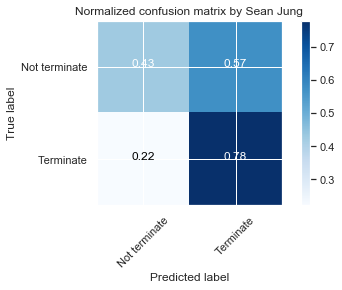

In [28]:
# This is a normalized confusion matrix of the model (Default)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('Not terminate', "Terminate"), normalize=True,
                      title='Normalized confusion matrix by Sean Jung')

plt.show()

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification (Modified 2)
#cnf_matrix_2 = confusion_matrix(y_test, y_pred_2)
#np.set_printoptions(precision=2)

In [ ]:
# Classification report (Modified 1)
# print(classification_report(y_test, y_pred_1))